# Exponential Smoothing

## Data Preparation

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import os
import matplotlib
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import math

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


os.chdir('/Users/pierlim/PycharmProjects/IndianTV')
df = pd.read_csv("./data/ActualRatings_weeklyGRP.csv")
df = df.drop(df.columns[2], axis=1)
split_str = df['GRPRatingsDate'].str.split('(')
df['GRPRatingsDate'] = split_str.str[0]
df['GRPRatingsDate'] = pd.to_datetime(df['GRPRatingsDate'])

df = df.set_index('GRPRatingsDate')
df.plot()
plt.title('Weekly Ratings 2007 - 2009')
plt.show()
df.tail()

<Figure size 640x480 with 1 Axes>

,GRP
GRPRatingsDate,
2009-02-15,204.20
2009-02-22,200.61
2009-03-01,208.56
2009-03-08,191.74
2009-03-15,222.07


In [3]:
# Get train test
df_train = df[:'2008-10-26']
print(df_train.tail())
print(df_train.shape)

                   GRP
GRPRatingsDate        
2008-09-28      219.91
2008-10-05      193.84
2008-10-12      201.30
2008-10-19      198.40
2008-10-26      170.74
(72, 1)


In [4]:
df_test = df['2008-11-1':]
print(df_test.head())
print(df_test.shape)


                   GRP
GRPRatingsDate        
2008-11-02      206.61
2008-11-09      188.68
2008-11-16      197.64
2008-11-23      193.16
2008-11-30      184.74
(20, 1)


## Just for trying out, actual used statsmodels functions later on

In [5]:
def exponential_smoothing(series, alpha):
    """
        series - dataset with timestamps
        alpha - float [0.0, 1.0], smoothing parameter
    """
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result
    
def plotExponentialSmoothing(series, alphas):
    """
        Plots exponential smoothing with different alphas
        
        series - dataset with timestamps
        alphas - list of floats, smoothing parameters
        
    """
    with plt.style.context('seaborn-white'):    
        plt.figure(figsize=(15, 7))
        for alpha in alphas:
            plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
        plt.plot(series.values, "c", label = "Actual")
        plt.legend(loc="best")
        plt.axis('tight')
        plt.title("Exponential Smoothing")
        plt.grid(True);

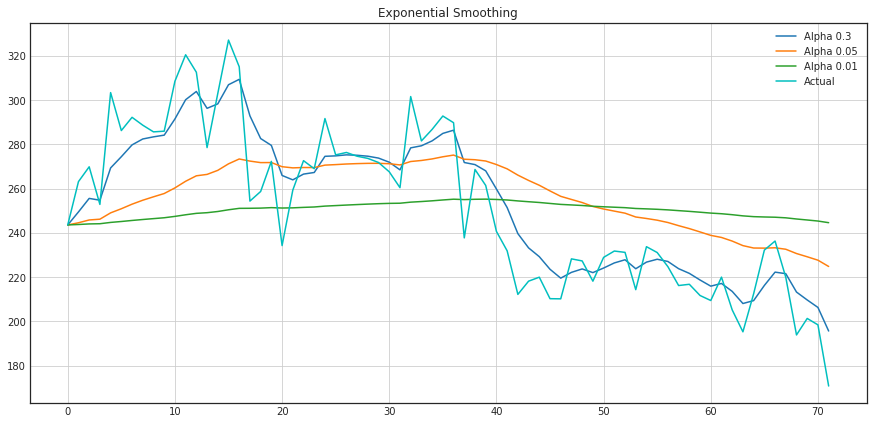

In [6]:
plotExponentialSmoothing(df_train['GRP'], [0.3, 0.05, 0.01])

In [7]:
# Choose 0.3 as alpha
alpha = 0.3
yhat = exponential_smoothing(df_train['GRP'], alpha)
print(yhat)

[243.59999999999999, 249.47699999999998, 255.60089999999997, 254.78462999999994, 269.38724099999996, 274.45806869999996, 279.80464808999994, 282.47925366299995, 283.44547756409997, 284.21483429487, 291.52738400640897, 300.24016880448625, 303.96911816314037, 296.35238271419826, 298.36466789993875, 307.02126752995713, 309.45688727096996, 292.93682108967897, 282.67477476277526, 279.57734233394268, 265.98213963375986, 263.99249774363193, 266.59574842054235, 267.3260238943796, 274.64421672606574, 274.83795170824601, 275.30056619577221, 275.11439633704049, 274.69007743592834, 273.83505420514985, 271.97353794360487, 268.51647656052342, 278.46253359236641, 279.40377351465651, 281.62864146025953, 285.00104902218169, 286.45273431552715, 271.83891402086897, 270.89423981460823, 268.06396787022572, 259.84877750915797, 251.46114425641053, 239.67680097948735, 233.22176068564113, 229.24323247994877, 223.54226273596413, 219.53058391517487, 222.14640874062241, 223.69848611843568, 222.03694028290494, 224

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import math

mae = mean_absolute_error(df_train['GRP'], yhat)
mse = mean_squared_error(df_train['GRP'], yhat)
print('Train set Prediction quality: {:.2f} MSE ({:.2f} RMSE),  ({:.2f} MAE)'.format(mse, math.sqrt(mse), mae))
mape = mean_absolute_percentage_error(df_train['GRP'], yhat)
print('Train set Prediction quality: {:.2f}% MAPE '.format(mape))
print(pd.DataFrame(yhat))

Train set Prediction quality: 184.01 MSE (13.56 RMSE),  (10.19 MAE)
Train set Prediction quality: 4.16% MAPE 
             0
0   243.600000
1   249.477000
2   255.600900
3   254.784630
4   269.387241
5   274.458069
6   279.804648
7   282.479254
8   283.445478
9   284.214834
10  291.527384
11  300.240169
12  303.969118
13  296.352383
14  298.364668
15  307.021268
16  309.456887
17  292.936821
18  282.674775
19  279.577342
20  265.982140
21  263.992498
22  266.595748
23  267.326024
24  274.644217
25  274.837952
26  275.300566
27  275.114396
28  274.690077
29  273.835054
..         ...
42  239.676801
43  233.221761
44  229.243232
45  223.542263
46  219.530584
47  222.146409
48  223.698486
49  222.036940
50  224.101858
51  226.408301
52  227.842811
53  223.785967
54  226.778177
55  228.080724
56  227.072507
57  223.807755
58  221.690428
59  218.687300
60  215.904110
61  217.129877
62  213.541914
63  208.054340
64  209.373038
65  216.224126
66  222.249889
67  221.547922
68  213.235545
69  2

## Simple Exponential Smoothing

In [9]:
from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing

In [10]:
fit2 = SimpleExpSmoothing(np.asarray(df_train['GRP'])).fit(smoothing_level=alpha,optimized=False)
df_forecast = df_test
df_forecast['forecast'] = fit2.forecast(len(df_test))
df_forecast = df_forecast.drop('GRP', axis=1)
print(df_forecast)

                  forecast
GRPRatingsDate            
2008-11-02      195.616892
2008-11-09      195.616892
2008-11-16      195.616892
2008-11-23      195.616892
2008-11-30      195.616892
2008-12-07      195.616892
2008-12-14      195.616892
2008-12-21      195.616892
2008-12-28      195.616892
2009-01-04      195.616892
2009-01-11      195.616892
2009-01-18      195.616892
2009-01-25      195.616892
2009-02-01      195.616892
2009-02-08      195.616892
2009-02-15      195.616892
2009-02-22      195.616892
2009-03-01      195.616892
2009-03-08      195.616892
2009-03-15      195.616892


/Users/pierlim/anaconda/envs/tensorflow/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


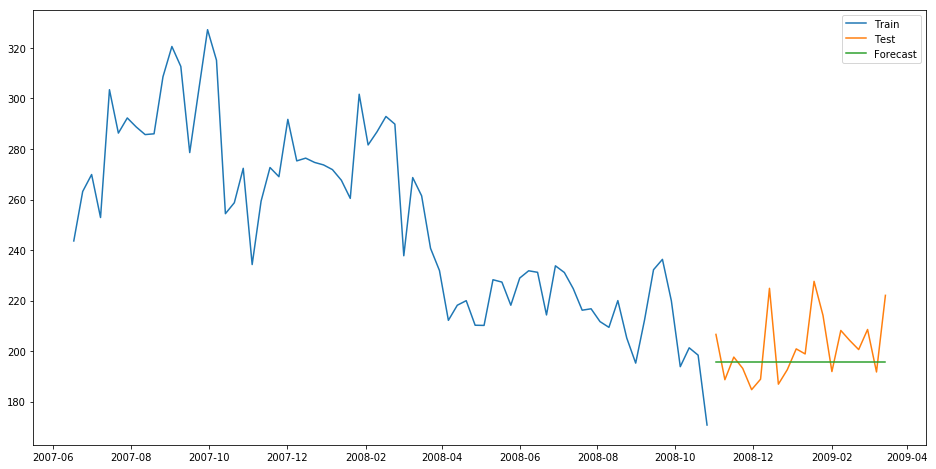

In [11]:
plt.figure(figsize=(16,8))
plt.plot(df_train['GRP'], label='Train')
plt.plot(df_test['GRP'], label='Test')
plt.plot(df_forecast['forecast'], label='Forecast')
plt.legend(loc='best')
plt.show()

In [12]:
mae = mean_absolute_error(df_test['GRP'], df_forecast['forecast'])
mse = mean_squared_error(df_test['GRP'], df_forecast['forecast'])
print('Prediction quality: {:.2f} MSE ({:.2f} RMSE),  ({:.2f} MAE)'.format(mse, math.sqrt(mse), mae))
mape = mean_absolute_percentage_error(df_test['GRP'], df_forecast['forecast'])
print('Prediction quality: {:.2f}% MAPE '.format(mape))

Prediction quality: 191.98 MSE (13.86 RMSE),  (10.65 MAE)
Prediction quality: 5.09% MAPE 


In [13]:
fit1 = Holt(np.asarray(df_train['GRP'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
df_forecast = df_test
df_forecast['forecast'] = fit1.forecast(len(df_test))
df_forecast = df_forecast.drop('GRP', axis=1)
print(df_forecast)

                  forecast
GRPRatingsDate            
2008-11-02      191.194288
2008-11-09      188.923790
2008-11-16      186.653293
2008-11-23      184.382795
2008-11-30      182.112297
2008-12-07      179.841800
2008-12-14      177.571302
2008-12-21      175.300805
2008-12-28      173.030307
2009-01-04      170.759810
2009-01-11      168.489312
2009-01-18      166.218815
2009-01-25      163.948317
2009-02-01      161.677820
2009-02-08      159.407322
2009-02-15      157.136824
2009-02-22      154.866327
2009-03-01      152.595829
2009-03-08      150.325332
2009-03-15      148.054834


/Users/pierlim/anaconda/envs/tensorflow/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


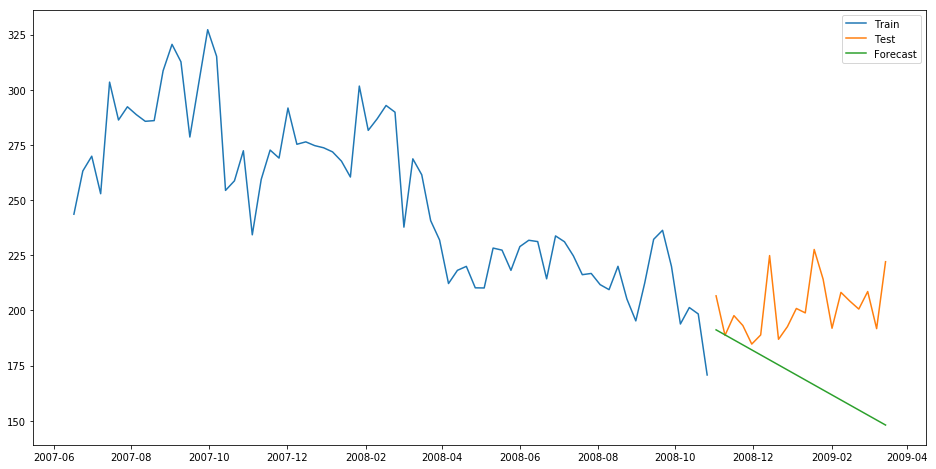

In [14]:
plt.figure(figsize=(16,8))
plt.plot(df_train['GRP'], label='Train')
plt.plot(df_test['GRP'], label='Test')
plt.plot(df_forecast['forecast'], label='Forecast')
plt.legend(loc='best')
plt.show()

In [15]:
mae = mean_absolute_error(df_test['GRP'], df_forecast['forecast'])
mse = mean_squared_error(df_test['GRP'], df_forecast['forecast'])
print('Prediction quality: {:.2f} MSE ({:.2f} RMSE),  ({:.2f} MAE)'.format(mse, math.sqrt(mse), mae))
mape = mean_absolute_percentage_error(df_test['GRP'], df_forecast['forecast'])
print('Prediction quality: {:.2f}% MAPE '.format(mape))

Prediction quality: 1466.18 MSE (38.29 RMSE),  (32.04 MAE)
Prediction quality: 15.44% MAPE 


Observation here is that the holt's winter method does anticipate the trend of going downwards generally, but the reality is that the ratings from November 2008 onwards took a small upturn.

## Holt's Winter Method

In [16]:
fit1 = ExponentialSmoothing(np.asarray(df_train['GRP']) ,seasonal_periods=12 ,trend='add', seasonal='add',).fit()
df_forecast = df_test
df_forecast['forecast'] = fit1.forecast(len(df_test))
df_forecast = df_forecast.drop('GRP', axis=1)
print(df_forecast)

                  forecast
GRPRatingsDate            
2008-11-02      184.420168
2008-11-09      171.770841
2008-11-16      182.600618
2008-11-23      182.101999
2008-11-30      188.614629
2008-12-07      175.284640
2008-12-14      177.895768
2008-12-21      177.164956
2008-12-28      173.036417
2009-01-04      173.094433
2009-01-11      180.509938
2009-01-18      181.432355
2009-01-25      184.420168
2009-02-01      171.770841
2009-02-08      182.600618
2009-02-15      182.101999
2009-02-22      188.614629
2009-03-01      175.284640
2009-03-08      177.895768
2009-03-15      177.164956


/Users/pierlim/anaconda/envs/tensorflow/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


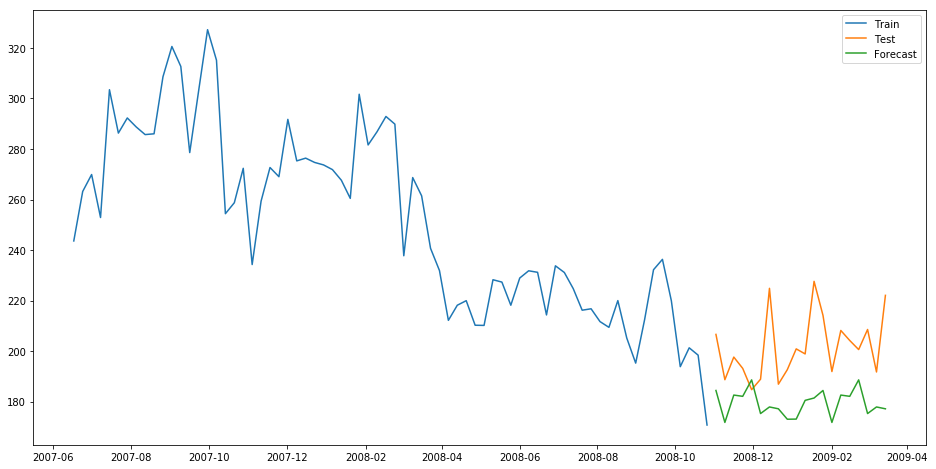

In [17]:
plt.figure(figsize=(16,8))
plt.plot(df_train['GRP'], label='Train')
plt.plot(df_test['GRP'], label='Test')
plt.plot(df_forecast['forecast'], label='Forecast')
plt.legend(loc='best')
plt.show()

In [18]:
mae = mean_absolute_error(df_test['GRP'], df_forecast['forecast'])
mse = mean_squared_error(df_test['GRP'], df_forecast['forecast'])
print('Prediction quality: {:.2f} MSE ({:.2f} RMSE),  ({:.2f} MAE)'.format(mse, math.sqrt(mse), mae))
mape = mean_absolute_percentage_error(df_test['GRP'], df_forecast['forecast'])
print('Prediction quality: {:.2f}% MAPE '.format(mape))

Prediction quality: 657.18 MSE (25.64 RMSE),  (22.64 MAE)
Prediction quality: 10.94% MAPE 


Observation here is that the holt's winter method does anticipate the trend of going downwards generally, but the reality is that the ratings from November 2008 onwards took a small upturn. 